In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
from random import uniform


# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

In [ ]:
fig, ax = plt.subplots()
x = np.arange(0, 5, 0.01)
Os = np.linspace(0, 2, 10)

for i in range(10):
    y = ( np.cos( (np.pi) * Os[i] * x )) *  np.exp( -x ) 
    ax.plot(x,y)

plt.show()



# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

In [ ]:
df = pd.read_csv(r'C:\Users\David\Documents\code\Module 2\m2-2-viz\data\tennis.csv')

df['start date'] = pd.DatetimeIndex(data=df['start date'])

line_frame = pd.DataFrame(df.groupby(by='year').mean()['player1 double faults'] 
    / df.groupby(by='year').mean()['player1 total points total'])

x = df['start date']
y = ( df['player1 double faults'] / df['player1 total points total'] )

x2 = pd.DataFrame(df.groupby(by='year')['start date'].max() )


fig, ax = plt.subplots()
plt.style.use('default')

plt.xlabel('Year')
plt.ylabel('Double faults per match')

ax.set_yticks([0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06])
ax.set_xticks(range(0, len(x), (len(x)//30)))
ax.set_xticklabels([1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

ax.scatter( x, y, alpha=0.5)
ax.plot(x2, (line_frame), c='orange', lw=2)

plt.show()

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


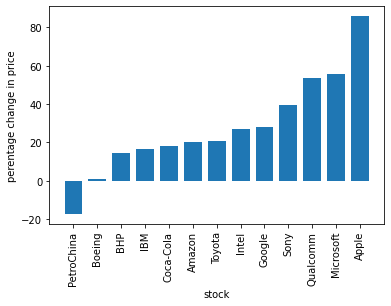

In [4]:
import datetime as dt
# !pip install --upgrade pandas-datareader
from pandas_datareader import data

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def plot_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices
    
    x = [tick for tick in ticker]
    y = []
    True_Name = []

    for tick in ticker:
        change = ticker[tick][-1] - ticker[tick][0]
        per_change = ( change / ticker[tick][0] )*100
        y.append(per_change)
        
        True_Name.append(ticker_list[tick])

    d = {'Name' : True_Name, 'Stock' : x, 'Percentage Change' : y}
    df = pd.DataFrame(data=d)
    df = df.sort_values(by=['Percentage Change'], ascending = True)

    plt.bar(df['Name'] , df['Percentage Change'] , width=0.75)
    plt.xlabel('stock')
    plt.xticks(rotation=90)
    plt.ylabel('perentage change in price')
    return plt.show()
    return df

ticker = plot_data(ticker_list)

ticker


# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

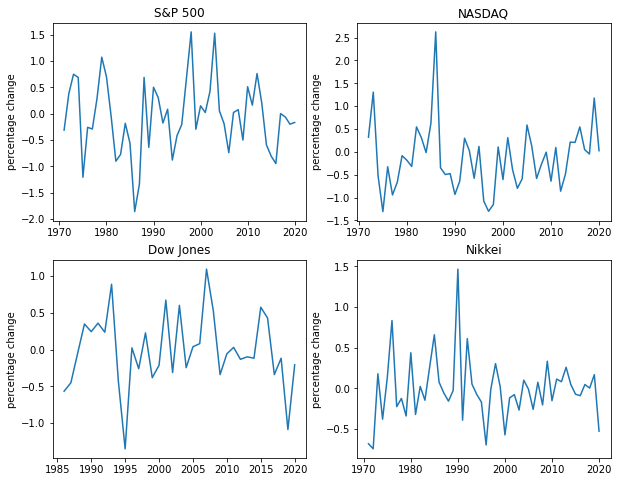

In [5]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

def read_data(indices_list,
          start=dt.datetime(1970, 1, 2),
          end=dt.datetime(2020, 12, 1)):

    ticker = pd.DataFrame()

    for tick in indices_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices
  
    
    fig, axes = plt.subplots(2,2, figsize=(10, 8))
    flag = 0
    
    for tick in ticker:
        df = ticker.loc[:, tick]
        df.dropna(inplace=True)  

        x = []
        y = []
        years = df.index.year.unique()

        for year in years:

            if df[year] == 'NaN':
                pass
            if year == years[0]:
                past_year = year
                pass
            else:
                x.append(year)
                y.append( ( (df[past_year]  - df[year]) / df[past_year] )*100 )
                past_year = year
        
        if flag == 0:
            i = 0
            j = 0
        if flag == 1:
            i = 0
            j = 1
        if flag == 2:
            i = 1
            j = 0
        if flag == 3:
            i = 1
            j = 1
        else:
            pass

        flag += 1
        axes[i, j].set(ylabel='percentage change')
        axes[i, j].set_title(indices_list[tick])
        axes[i, j].plot(x, y)
     
        
    return plt.show()


ticker = read_data(indices_list)

ticker

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

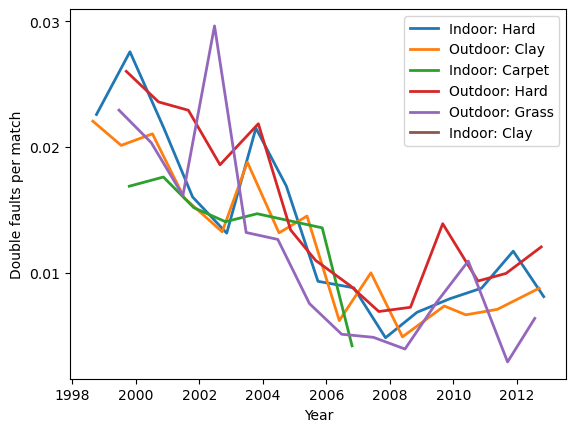

In [20]:
df = pd.read_csv(r'C:\Users\David\Documents\code\Module 2\m2-2-viz\data\tennis.csv')

df['start date'] = pd.DatetimeIndex(data=df['start date'])

fig, ax = plt.subplots()
plt.style.use('default')

for surface in df['surface'].unique():

    df_ = df.loc[df.surface == surface]

    line_frame = pd.DataFrame(df_.groupby(by='year').mean()['player1 double faults'] 
    / df_.groupby(by='year').mean()['player1 total points total'])

    x = pd.DataFrame(df_.groupby(by='year')['start date'].max() )

    plt.xlabel('Year')
    plt.ylabel('Double faults per match')

    ax.set_yticks([0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06])

    ax.plot(x, (line_frame), label=surface, lw=2)

ax.legend()
plt.show()
